### TITLE : Performance Measurement of Strategies - KPI

<p> Author : BRYAN LIM YUQIANG </p> 
<p> Contact me : </p>
<li>Bryanlimyuqiang@gmail.com</li>
<li><a href = "https://www.linkedin.com/in/bryanlimyuqiang/">Linkedin </a></li> 
<li><a href = "https://www.etoro.com/people/bryanlimyuqiang"> Follow my trading journey </a></li>


### Covers:
1. Compounded Annual Growth Rate (CAGR)
2. Volatility
3. Sharpe and Sortino 
4. Maximum Drawdown and Calmar Ratio

In [15]:
import pandas_datareader.data as pdr 
import numpy as np
import datetime

<img src = "./images/PM_INTRO.jpg" />

## 1. COMPOUNDED ANNUAL GROWTH RATE  (CAGR)

<img src ="./images/CAGR.jpg" />

In [16]:
# We try to use the S&P500
ticker = '^GSPC'

# get_data_yahoo(ticker, start, end) , We use 5 years of Data
SnP = pdr.get_data_yahoo(ticker, datetime.date.today()- datetime.timedelta(1825), datetime.date.today())

In [17]:
def CAGR(DF):
    df = DF.copy()
    df['daily_ret'] = DF['Adj Close'].pct_change() 
    
    # cum prod of daily_ret, use excel to visualise if unsure
    df['cum_ret'] = (1 + df['daily_ret']).cumprod()  
    
    # get len of rows of data divide by 252 to get number of trading years!!
    n = len(df)/252 
    
    # We only want the last value as it represents the end net ret of our strategy over the period, refer to formula 
    CAGR = df['cum_ret'][-1]**(1/n) - 1
    
    
    return CAGR

In [18]:
CAGR(SnP)

0.06838149223270218

## 2. Annualised Volatility

<img src = "./images/Annual_VOL.jpg" />

In [19]:
def volatility(DF):
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    
    #annualised volatility based of daily volatility 
    vol = df['daily_ret'].std() * np.sqrt(252)
    
    return vol

In [21]:
volatility(SnP)

0.18940117733974982

## 3. Sharpe And Sortino Ratios

<img src = "./images/Sortino_sharpe.jpg" />

In [25]:
# rf = risk-free rate, you may choose to use 10-year treasury yields etc 
rf = 0.022 

def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr 

In [26]:
sharpe(SnP, rf)

0.24488492037989062

In [28]:
def sortino(DF, rf):
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change() 
    
    #filter only negative vol 
    neg_vol = df[df['daily_ret'] < 0]['daily_ret'].std() * np.sqrt(252)
    sr = (CAGR(df) - rf) / neg_vol
    
    return sr

In [29]:
sortino(SnP, rf)

0.2746330291554383

## 4. Maximum Drawdown & Calmar Ratio

<img src = "./images/drawdown_calmar.jpg" />

<img src="./images/calmar_ratio.png" />

In [40]:
def max_drawdown(DF):
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['cum_return'] = (1+ df['daily_ret']).cumprod()
    
    # Find highest peak in DF
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    df['drawdown_pct']  =df['drawdown'] / df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    
    return df

The max drawdown in the dataset was 0.339250


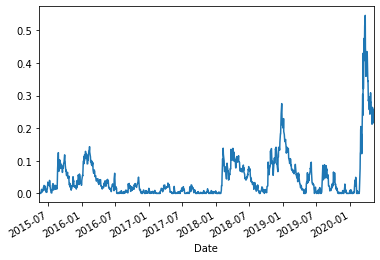

In [53]:
print("The max drawdown in the dataset was {:2f}".format(max_drawdown(SnP)['drawdown_pct'].max()))
max_drawdown(SnP)['drawdown'].plot();

In [60]:
def calmar(DF):
    df = DF.copy()
    clmr  = CAGR(df)/(max_drawdown(df)['drawdown_pct'].max())
    return clmr

In [61]:
calmar(SnP)

0.2015669059811831